In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# load csv
df_municipis = pd.read_csv('data/poblacio_municipis.csv')

In [145]:
decimal_places = 1
df_municipis['Latitud_round'] = df_municipis.Latitud.apply(lambda x: round(float(x), decimal_places))
df_municipis['Longitud_round'] = df_municipis.Longitud.apply(lambda x: round(float(x), decimal_places))
df_municipis['Poblacio'] = df_municipis.Poblacio_2003.apply(lambda x: float(x.replace('.', '')))

latitud_poblacio = df_municipis.groupby('Latitud_round')['Poblacio'].sum()
max_latitud_poblacio = np.max(latitud_poblacio.values)
latitud_poblacio_percentatge = latitud_poblacio.apply(lambda x: x / max_latitud_poblacio * 100)
longitud_poblacio = df_municipis.groupby('Longitud_round')['Poblacio'].sum()
max_longitud_poblacio = np.max(longitud_poblacio.values)
longitud_poblacio_percentatge = longitud_poblacio.apply(lambda x: x / max_longitud_poblacio * 100)
print(longitud_poblacio_percentatge.values)
print(longitud_poblacio.index.values)

[  0.5128256    1.21739249   3.92486919   9.13303051   2.24549991
   2.43781604   2.33977662   2.323158    10.21648107   2.72383403
   8.08647537   1.55033979   1.86217413   5.45357342   5.08420102
   9.97383873   7.80066642  35.13025237  45.79015801 100.
  15.25558187  11.65874756   4.22160045   3.00556672   3.59662527
   7.55107352   1.73753447   4.38742085   3.3929165    2.39083446
   0.13650265]
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.
 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3]


In [5]:
# load img
img = plt.imread('img/map_catalonia.png')

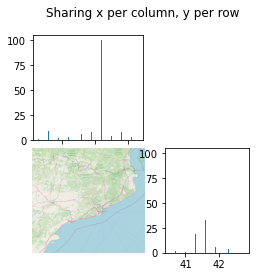

In [152]:
fig = plt.figure()

gs = fig.add_gridspec(2, 2, hspace=0.08, wspace=-0.45)
(ax1, ax2), (ax3, ax4) = gs.subplots()
fig.suptitle('Sharing x per column, y per row')
ax1.bar(longitud_poblacio.index.values, longitud_poblacio_percentatge.values, width=0.01)
ax2.plot(1, 42)
# plot image
ax3.imshow(img, extent=[0, 3.5, 40.3, 43])
ax4.bar(latitud_poblacio.index.values, latitud_poblacio_percentatge.values, width=0.01)
ax1.set_aspect(0.03)
#ax1.axis('off')
ax2.set_aspect(1.2)
ax2.axis('off')
ax3.set_aspect(1.2)
ax3.axis('off')
ax4.set_aspect(0.03)
#ax4.axis('off')

